### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 3


### Дисциплина: Методы машинного обучения

##### Студент:  Матюхин Григорий Васильевич
##### Группа:   НПИбд-01-21

## Москва 2024
***

### Вариант №26
1. Функция одной переменной $f(x)=(9-x^2)e^{-x}$ на отрезке $[0,2]$;
2. Порядок производной функции одной переменной $4$;
3. Функция двух переменных $f(x,y)=x\ln(x+y)$ в области $[1,5]\times[1,5]$;
4. Порядок смешанной производной функции двух переменных $\frac{\partial^3}{\partial x^2\partial y}$;
5. Показатель качества регресси: среднее абсолютное процентное отклонение (MAPE).

# Выполнение

## Шаг 1: Min и Max тензора функции одной переменной

In [1]:
import tensorflow as tf
import numpy as np
tf.__version__

2024-04-30 19:34:18.579691: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 19:34:18.582511: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 19:34:18.630258: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 19:34:19.440905: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.16.1'

In [2]:
import math

In [3]:
def single_var_f(x):
    return tf.multiply(tf.subtract(9, tf.pow(x, 2)), tf.exp(-x))

In [4]:
single_var_x = tf.constant(np.linspace(0, 2, 100))
single_var_y = single_var_f(single_var_x)

In [5]:
mn = tf.reduce_min(single_var_y)
mx = tf.reduce_max(single_var_y)
print("Минимум:", mn.numpy()) 
print("Максимум:", mx.numpy())

Минимум: 0.6766764161830635
Максимум: 9.0


## Шаг 2: График функции

In [6]:
import matplotlib.pyplot as plt

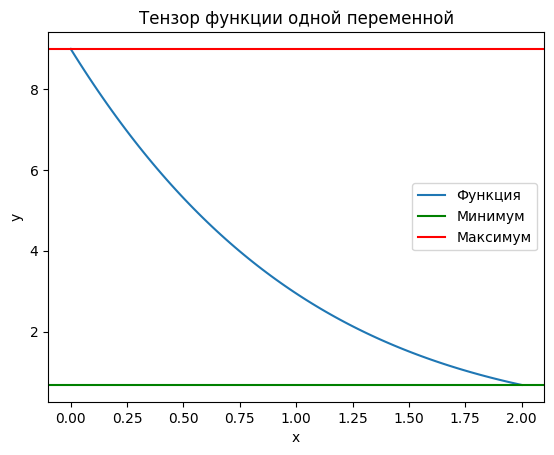

In [7]:
plt.figure()
plt.title("Тензор функции одной переменной")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(single_var_x, single_var_y, label="Функция")
plt.axhline(y=mn, label="Минимум", color="g")
plt.axhline(y=mx, label="Максимум", color="r")
plt.legend()

## Шаг 3: Производная

In [8]:
x = tf.Variable(single_var_x)
with tf.GradientTape() as gt1:
    with tf.GradientTape() as gt2:
        with tf.GradientTape() as gt3:
            with tf.GradientTape() as gt4:
                y = single_var_f(x)
            d1 = gt4.gradient(y, x)
        d2 = gt3.gradient(d1, x)
    d3 = gt2.gradient(d2, x)
d4 = gt1.gradient(d3, x)

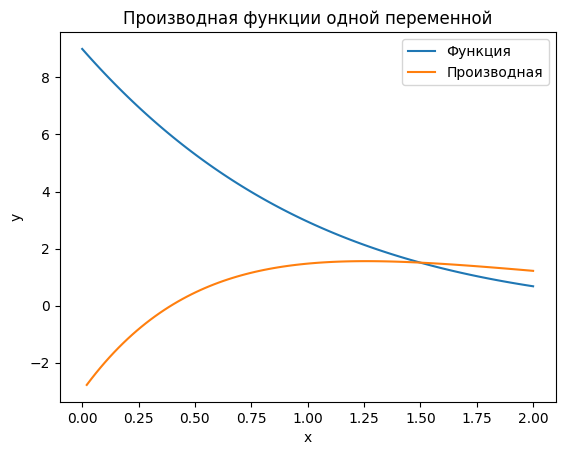

In [9]:
plt.figure()
plt.title("Производная функции одной переменной")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, label="Функция")
plt.plot(x, d4, label="Производная")
plt.legend()

## Шаг 4: Матрица из функции двух переменных

In [10]:
def two_var_f(x, y):
    return tf.multiply(x, tf.math.log(tf.add(x, y)))

In [11]:
dim = np.linspace(1, 5, 50)
x, y = tf.constant(np.meshgrid(dim, dim))
z = two_var_f(x, y)

In [12]:
mn = tf.reduce_min(z)
mx = tf.reduce_max(z)
print("Минимум:", mn.numpy()) 
print("Максимум:", mx.numpy())

Минимум: 0.6931471805599453
Максимум: 11.512925464970227


## Шаг 5: 3D график

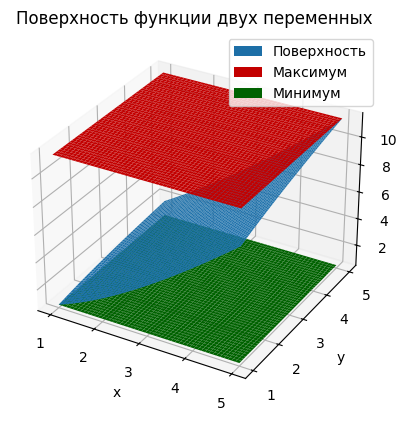

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Поверхность функции двух переменных")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.plot_surface(x, y, z, label="Поверхность")
ax.plot_surface(x, y, np.full(z.shape, mx), color="r", label="Максимум")
ax.plot_surface(x, y, np.full(z.shape, mn), color="g", label="Минимум")
ax.legend()

## Шаг 6: Смешанная производная

In [14]:
x = tf.Variable(x)
y = tf.Variable(y)
with tf.GradientTape() as gt1:
    with tf.GradientTape() as gt2:
        with tf.GradientTape() as gt3:
            z = two_var_f(x, y)
        dz_dx = gt3.gradient(z, x)
    dz2_dx2 = gt2.gradient(dz_dx, x)
dz3_dx2dy = gt1.gradient(dz2_dx2, y)
dz3_dx2dy

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[-0.25      , -0.22172656, -0.19756074, ..., -0.0100582 ,
        -0.00964771, -0.00925926],
       [-0.23982669, -0.21368815, -0.19121412, ..., -0.01043528,
        -0.01001512, -0.00961721],
       [-0.22981555, -0.20564538, -0.18474915, ..., -0.01077098,
        -0.01034304, -0.00993748],
       ...,
       [-0.04864883, -0.04666341, -0.04478458, ..., -0.0106865 ,
        -0.01042046, -0.01016317],
       [-0.04745098, -0.04554044, -0.0437311 , ..., -0.01059633,
        -0.0103347 , -0.01008162],
       [-0.0462963 , -0.04445693, -0.04271372, ..., -0.01050624,
        -0.01024895, -0.01      ]])>

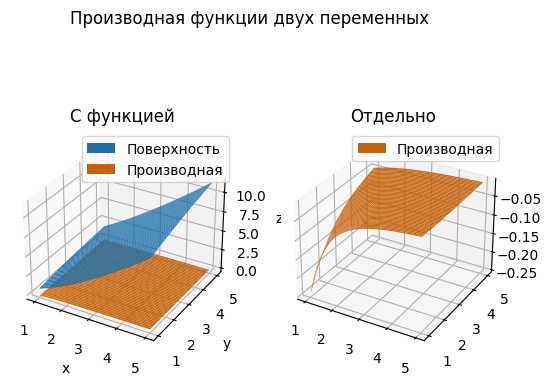

In [15]:
fig = plt.figure()
plt.suptitle("Производная функции двух переменных")

ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.set_title("С функцией")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.plot_surface(x, y, z, label="Поверхность")
ax.plot_surface(x, y, dz3_dx2dy, label="Производная")
ax.legend()

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.set_title("Отдельно")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax2.plot_surface(x, y, dz3_dx2dy, color="tab:orange", label="Производная")
ax2.legend()

## Шаг 7: Парная линейная регрессия

### Масштабирование данных

In [16]:
mn = tf.reduce_min(single_var_x)
mx = tf.reduce_max(single_var_x)
INPUT = tf.cast(tf.divide(tf.subtract(single_var_x, mn), tf.subtract(mx, mn)), dtype=tf.float32)

In [17]:
mn = tf.reduce_min(single_var_y)
mx = tf.reduce_max(single_var_y)
TARGET = tf.cast(tf.divide(tf.subtract(single_var_y, mn), tf.subtract(mx, mn)), dtype=tf.float32)

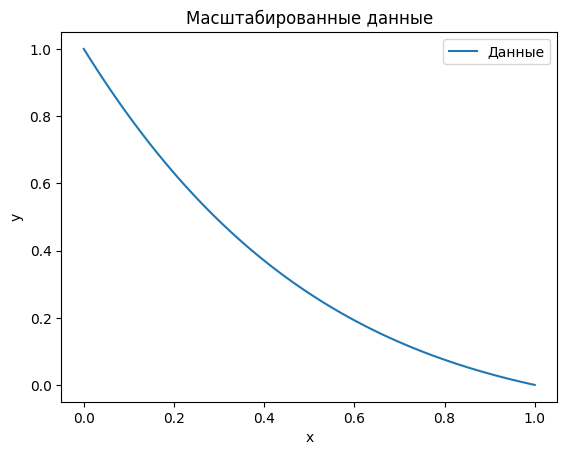

In [18]:
plt.figure()
plt.title("Масштабированные данные")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(INPUT, TARGET, label="Данные")
plt.legend()

### Модель

In [19]:
class Model():
    def __init__(self):
        self.w = tf.Variable(tf.random.normal(()))
        self.b = tf.Variable(tf.random.normal(()))
    def __call__(self, x):
        return tf.add(tf.multiply(self.w, x), self.b)

model = Model()
model.w, model.b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.39348936>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.35544136>)

In [20]:
def loss(predicted, target):
    return tf.reduce_mean(tf.square(predicted - target))

In [21]:
def mape(predicted, target):
    return tf.reduce_mean(tf.abs(tf.divide(tf.subtract(target, predicted), target)))

In [22]:
def plot_comparison(x, y, predicted):
    plt.figure()
    plt.title("Сравнение результатов модели с ожидаемыми данными")
    plt.scatter(x, y, marker=".", label="Реальные данные")
    plt.scatter(x, predicted, marker="+", label="Прогнозируемые данные")
    plt.legend()

MAPE: 1.7807847


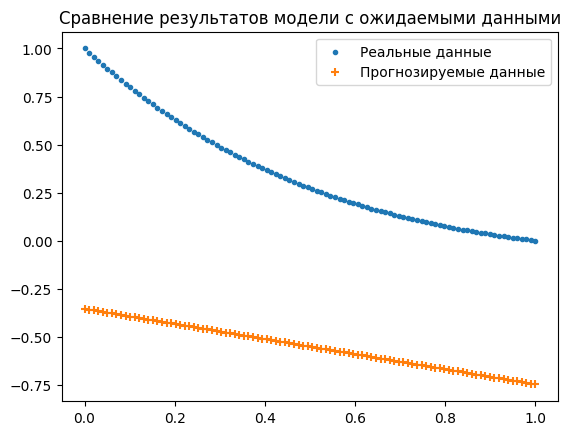

In [23]:
pred=model(INPUT)
plot_comparison(INPUT, TARGET, pred)
print("MAPE:", mape(TARGET, pred).numpy())

### Обучение

In [24]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as gt:
        current_loss = loss(model(inputs), outputs)
    dw, db = gt.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

In [25]:
model = Model()

list_w, list_b = [], []
epochs = range(1000)
losses = []
mapes = []
for epoch in epochs:
    list_w.append(model.w.numpy())
    list_b.append(model.b.numpy())
    current_loss = train(model, INPUT, TARGET, 0.01)
    losses.append(current_loss)
    current_mape = mape(TARGET, model(INPUT))
    mapes.append(current_mape)
    #print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f, mape=%2.5f' % (epoch, list_w[-1], list_b[-1], current_loss, current_mape))

## Шаг 8: Кривая обучения

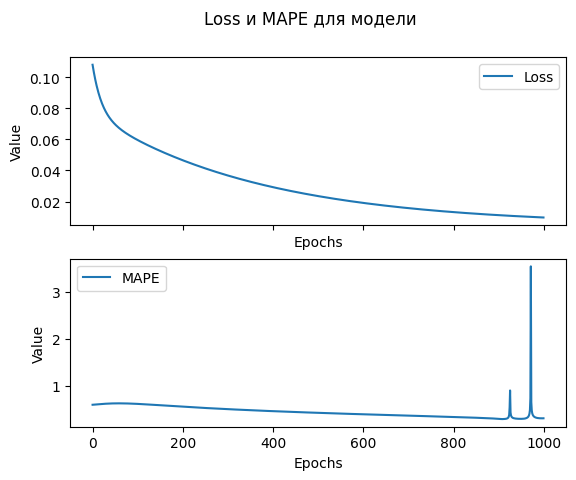

In [26]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
plt.suptitle("Loss и MAPE для модели")
ax1.plot(epochs, losses, label="Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Value")
ax1.legend()
ax2.plot(epochs, mapes, label="MAPE")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Value")
ax2.legend()

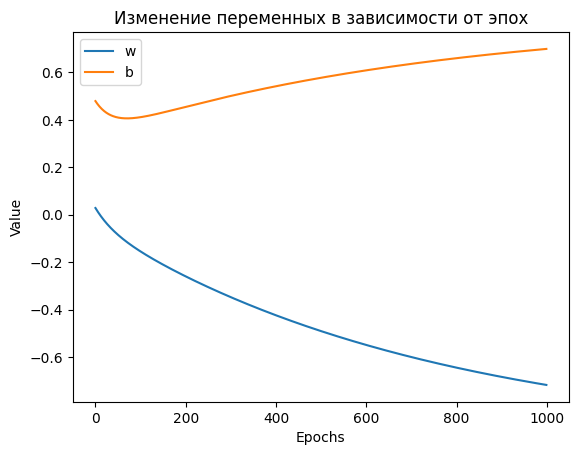

In [27]:
plt.figure()
plt.title("Изменение переменных в зависимости от эпох")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.plot(epochs, list_w, label="w")
plt.plot(epochs, list_b, label="b")
plt.legend()

## Шаг 9: Сравнение результатов

MAPE: 0.30035493


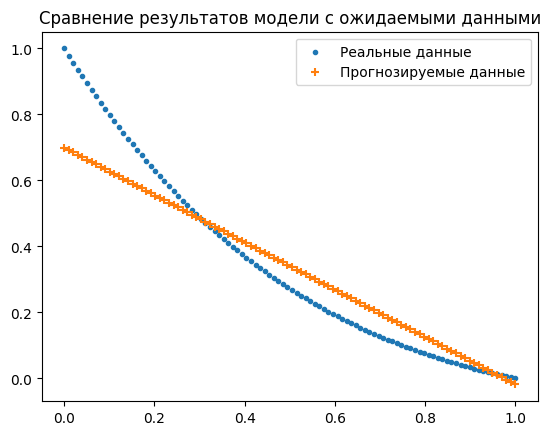

In [28]:
pred=model(INPUT)
plot_comparison(INPUT, TARGET, pred)
print("MAPE:", mape(TARGET, pred).numpy())